In [133]:
##CSCI E-83 Graduate Project: CarboChoice: Highlights CO₂ considerations when choosing a car.

####By Ekaterina Grinina
####December 20, 204

In [ ]:
###I. Executive Summary

####A.Motivation

Sustainability is one of the most crucial responsibilities we have toward our children and future generations. Every decision we make,
whether it's purchasing a new skirt or the latest model of an iPhone, should be evaluated through the lens of its ecological impact. 
This becomes especially important when it comes to products that have a significant influence on the environment, such as cars. In this project,
I aim to address this issue in a straightforward manner by exploring how to choose a sustainable car, with a particular focus on CO2 emissions.
The goal of this project is to identify the key characteristics that correlate most strongly with CO2 emissions. Additionally, we will analyze
which vehicle class and fuel types are the most sustainable, meaning it produces the least amount of CO2 emissions. This information will be valuable
in helping us make informed decisions when choosing a car to buy, rent, or even use as a taxi in the future.

####B. Questions we seek to answer

This analysis aims to answer the following questions:

1. Which factors are most strongly correlated with CO₂ emissions?
2. Which vehicle class demonstrates the highest sustainability?
3. Is there a fuel type that stands out as the most sustainable?

For question 1, I will develop a statistical model to identify significant relationships between CO₂ emissions (the dependent variable) and the
independent variables.

Questions 2 and 3 will be explored through detailed exploratory data analysis.

####C. Summary of findings
1.CO₂ Emissions Analysis
The CO₂ emissions analysis showed that three variables are the most influential predictors: Log_Engine_Size, Fuel Consumption City, and 
Fuel Consumption Hwy. Cylinders and Fuel Type are also significant. Additionally, the log transformation improved data symmetry and model performance.

Smaller vehicle classes (e.g., "Compact," "Subcompact") exhibit lower median CO₂ emissions and are more sustainable compared to larger classes
(e.g., "SUV-Standard," "Van-Passenger"). Larger classes show greater variability due to diverse designs and use cases.

From a fuel type perspective, N and D vehicles have lower average emissions than Z and E vehicles. Fuel type influences emissions, underscoring
its importance in modeling.

2.Statistical Analysis and Modeling
Statistical analysis confirmed significant differences in emissions across fuel types using random sampling. Bootstrapping further reinforced mean
differences among fuel types with robust confidence intervals. Both Elastic Net and OLS models highlighted Log_Engine_Size and fuel consumption metrics
as key predictors of CO2 emissions.

3. Residual Analysis
Residual analysis revealed heteroscedasticity and slight non-normality. While square root transformations improved normality, they failed to resolve
heteroscedasticity. Attempts to include interaction terms and apply inverse transformations resulted in worsened performance.

4. Limitations and Next Steps
Persistent heteroscedasticity limits model accuracy across emission ranges.
Advanced methods, such as Bayesian models or hierarchical modeling, require further exploration to address these issues and improve model robustness.

In [ ]:
###II. Data Sources

The data for this project is sourced from Kaggle https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data. The dataset contains
information on 7,385 different cars and includes 12 variables, with "CO2 Emissions" being the dependent variable.

####A. Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.datasets import load_diabetes
import numpy.random as nr
import datetime
import statsmodels.api as sm
from statsmodels.graphics import mosaicplot
import calendar
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/Grini/OneDrive/Документы/HES/Data Science/Project//co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
####B. Data preprocessing
Let's examine the basic information about the dataset to gain a better understanding of its structure and contents.

In [5]:
print("\nData Summary:")
print(df.describe())
print("\nData Information:")
print(df.info())


Data Summary:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.

In [ ]:
The dataset appears to contain information about vehicles, including their Make, Model, Vehicle Class, Engine Size (L), Cylinders, Transmission, 
Fuel Type, Fuel Consumption (in city, highway, and combined), and CO2 Emissions. This data provides insights into how vehicle features relate to 
fuel efficiency and CO2 emissions. The primary goal here is understanding the relationships between these features, not necessarily to predict outcomes.

In [ ]:
####C. Data cleaning
Before beginning the analysis, let's clean and prepare the data to ensure it is ready for exploration.

In [7]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
There are no missing values in any of the columns, as the sum of missing values is zero for each feature

In [43]:
###III. Exploratory Data Analysis

In [ ]:
####A.CO2 emissions 
####Visualize the distribution of CO2 emissions

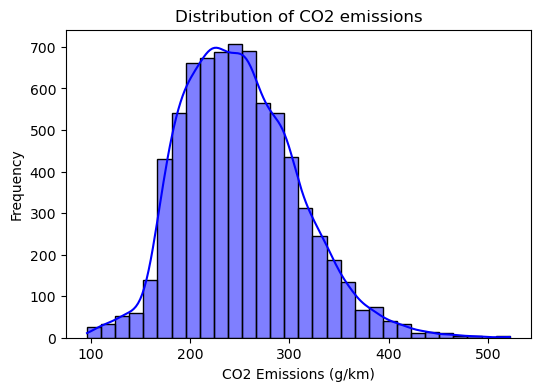

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True, color='blue')
plt.title('Distribution of CO2 emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
The mean appears to be approximately 250, with a minimum of 96 and a maximum of 522.
The chart of the raw CO2 emissions shows a right-skewed distribution, where the majority of the data points are concentrated toward the lower
CO2 emissions range (between 200-300 g/km).

The right tail is extended, indicating the presence of high-emission outliers. This skewness makes the distribution deviate significantly from
a normal distribution.
The peak (mode) is prominent, but the spread toward higher CO2 emissions values lacks symmetry.

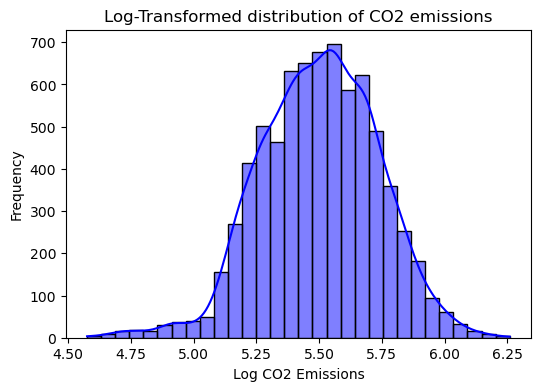

In [11]:
# Log Transformation for Normality
df['Log_CO2_Emissions'] = np.log1p(df['CO2 Emissions(g/km)'])
df['Log_Engine_Size'] = np.log1p(df['Engine Size(L)'])

# Log-Transformed CO2 Emissions Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Log_CO2_Emissions'], bins=30, kde=True, color='blue')
plt.title('Log-Transformed distribution of CO2 emissions')
plt.xlabel('Log CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
After applying a log transformation, the CO2 emissions distribution becomes more symmetrical.
The peak is still preserved but appears sharper, with the data points now better distributed on both sides of the peak.
The right tail of the distribution is significantly reduced, minimizing the impact of outliers. The overall shape appears closer
to a normal (bell-shaped) distribution, with better symmetry and reduced skewness.

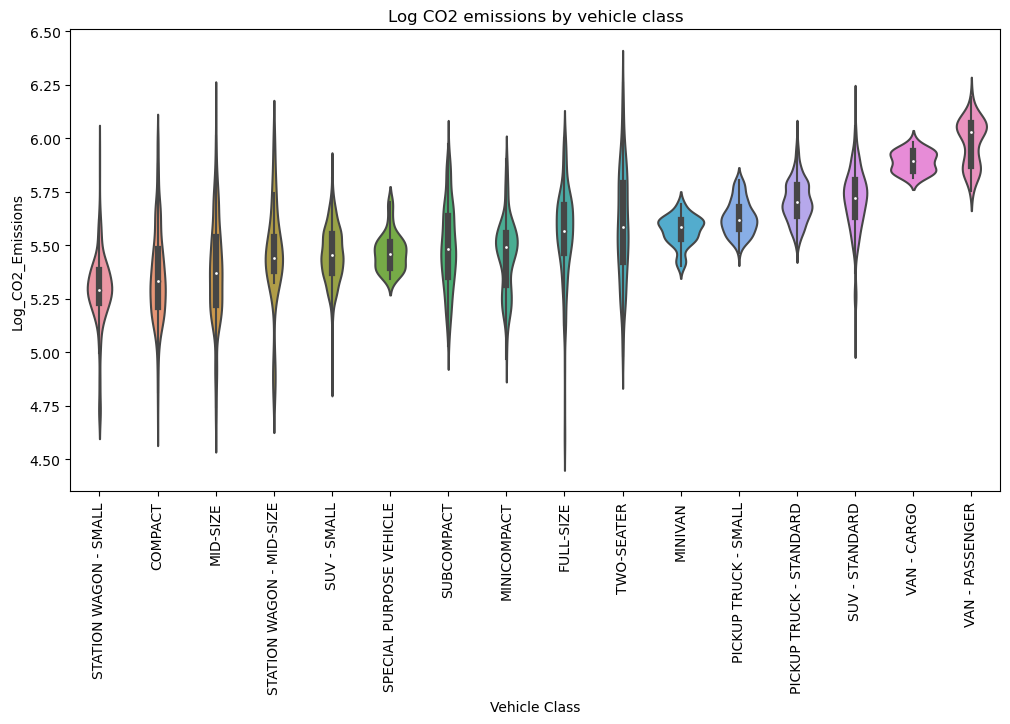

In [13]:
# Violin Plot for Numeric vs. Categorical Variables
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Vehicle Class', y='Log_CO2_Emissions', order=df.groupby('Vehicle Class')['Log_CO2_Emissions'].median().sort_values().index)
plt.xticks(rotation=90)
plt.title('Log CO2 emissions by vehicle class')
plt.show()

C:\Users\Grini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


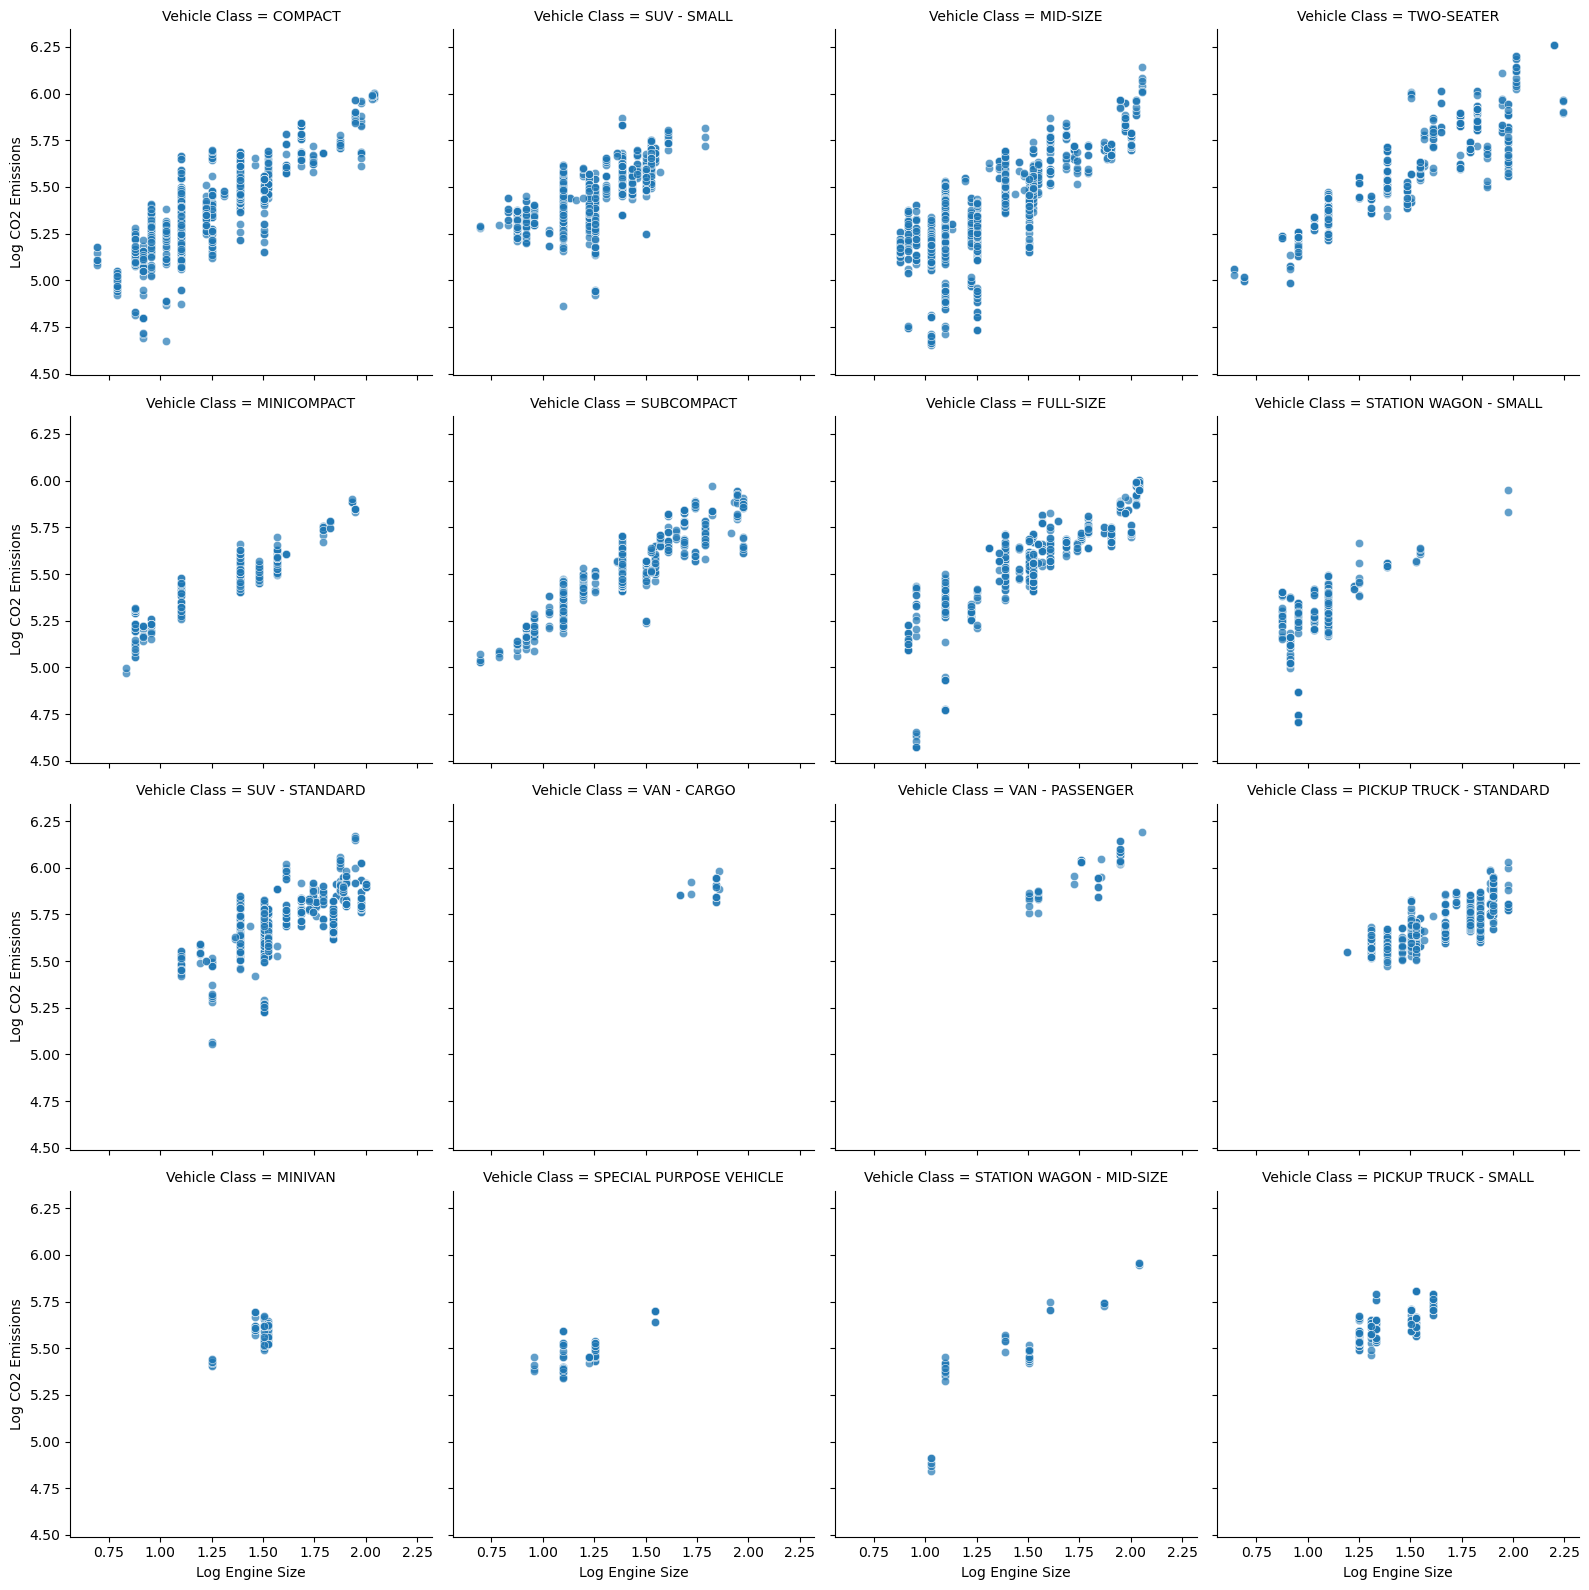

In [15]:
# Faceted Scatter Plot
facet = sns.FacetGrid(df, col="Vehicle Class", col_wrap=4, height=4, margin_titles=True)
facet.map(sns.scatterplot, 'Log_Engine_Size', 'Log_CO2_Emissions', alpha=0.7)
facet.set_axis_labels("Log Engine Size", "Log CO2 Emissions")
facet.tight_layout()
plt.show()

In [ ]:
Across most vehicle classes, there is a strong positive correlation between engine size and CO2 emissions, with larger engine sizes typically 
resulting in higher CO2 emissions. This trend is evident from the upward patterns in the scatter plots. Vehicle classes like "Compact," "Mid-Size,"
and "Station Wagon - Small" exhibit tightly clustered points, indicating consistent CO2 emissions for given engine sizes within these categories.

In contrast, classes such as "SUV - Standard," "Full-Size," and "Pickup Truck - Standard" display a wider spread in the relationship between engine
size and CO2 emissions. This variability likely reflects differences in fuel types, vehicle weights, or other design factors affecting emissions. 
The "Two-Seater" class shows a more dispersed pattern, with some vehicles producing significantly higher emissions for smaller engine sizes, possibly
due to the presence of high-performance or specialized vehicles.

Similarly, "Special Purpose Vehicles" exhibit a broad distribution, suggesting a diverse range of designs and uses. Meanwhile, "Minicompact" and
"Subcompact" classes have a narrower range of both engine sizes and CO2 emissions, indicating greater homogeneity in design and performance. Certain
classes, such as "Van - Cargo" and "Special Purpose Vehicles," show significant deviations from the general trend, likely caused by outliers or 
unique vehicle models with specialized features.

C:\Users\Grini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


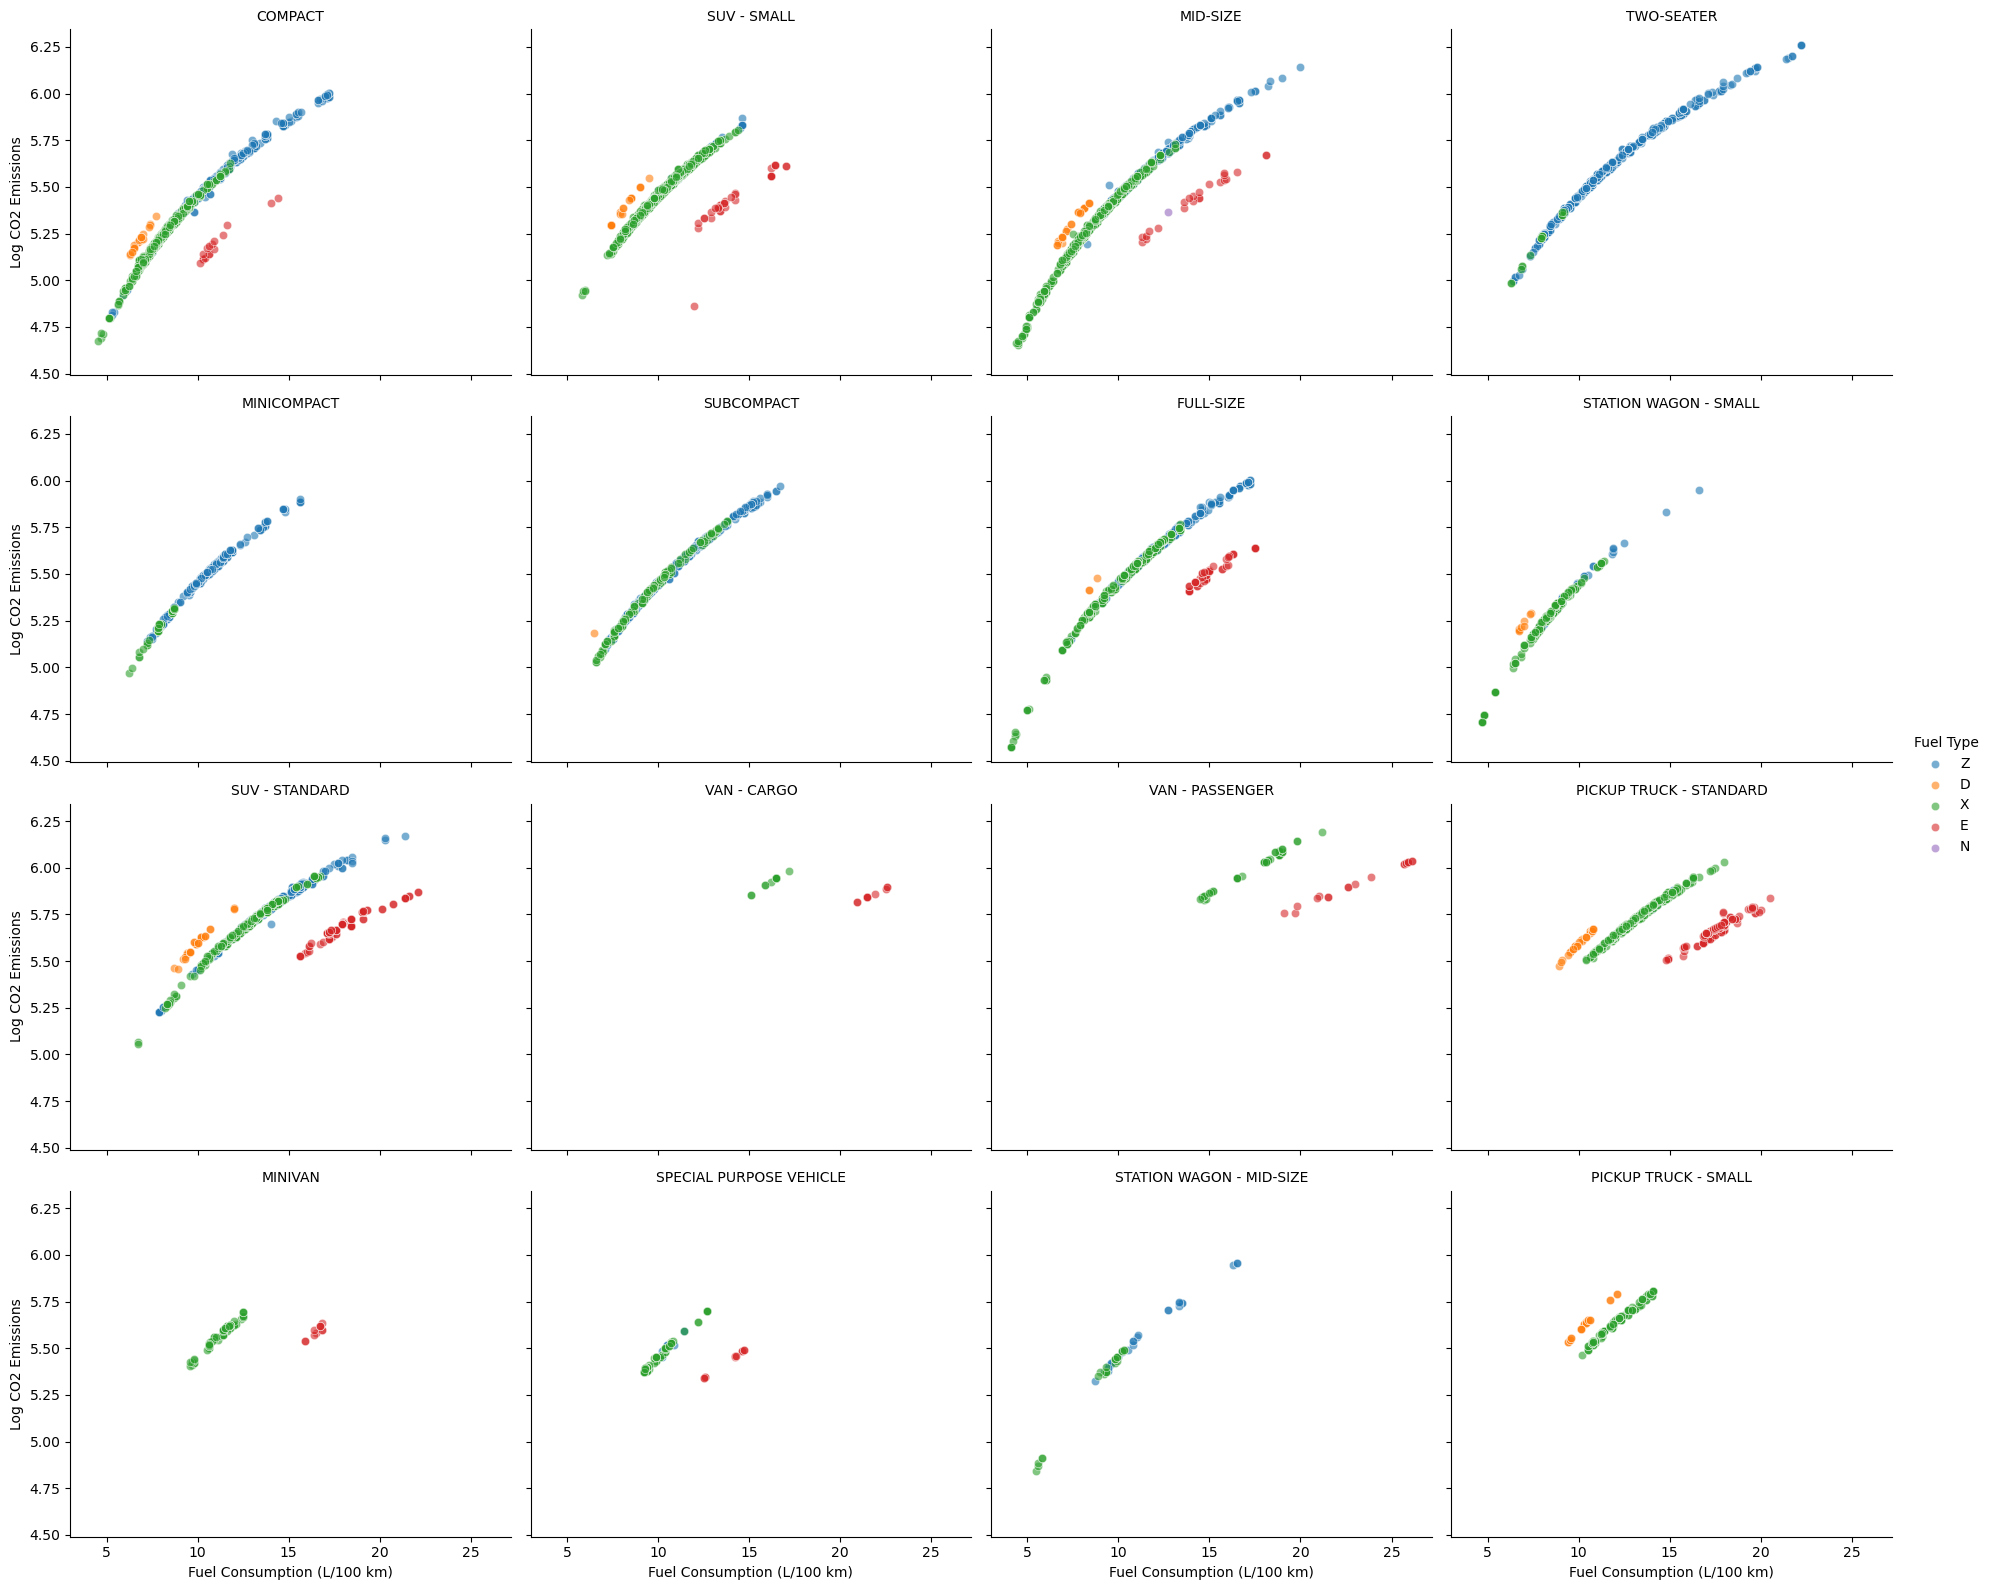

In [17]:
####Data Segmentation
g = sns.FacetGrid(df, col="Vehicle Class", hue="Fuel Type", col_wrap=4, height=4, aspect=1.2)
g.map(sns.scatterplot, "Fuel Consumption Comb (L/100 km)", "Log_CO2_Emissions", alpha=0.6)
g.add_legend()
g.set_axis_labels("Fuel Consumption (L/100 km)", "Log CO2 Emissions")
g.set_titles("{col_name}")
plt.show()

In [ ]:
###Analysis of Fuel Consumption vs. CO2 Emissions by Vehicle Class and Fuel Type
Across all vehicle classes, there is a strong positive correlation between fuel consumption and CO2 emissions. Vehicles with higher fuel consumption
consistently produce more CO2 emissions, regardless of their class or fuel type. Compact classes such as "Compact," "Subcompact," and "Minicompact"
display tightly clustered points, indicating consistent fuel consumption and emissions behavior across vehicles in these categories. 
These classes also tend to have lower emissions compared to larger vehicle classes for the same level of fuel consumption.

In contrast, larger vehicle classes like "SUV - Standard," "Full-Size," and "Pickup Truck - Standard" exhibit a broader spread in emissions for
similar fuel consumption levels. This variability may stem from factors such as differences in vehicle weight, aerodynamics, or engine technology.
These vehicles generally consume more fuel and emit higher levels of CO2 compared to smaller classes.

Fuel type significantly influences the relationship between fuel consumption and CO2 emissions. Diesel (D) vehicles typically generate lower CO2
emissions than gasoline (Z) vehicles for the same level of fuel consumption. Alternative fuels like ethanol (E85) (E) and
compressed natural gas (N), found in some vehicle classes, exhibit distinctly lower CO2 emissions, often deviating from trends observed for gasoline
and diesel. However, these fuels are not as widely represented. Outliers are visible across most vehicle classes, particularly in larger ones like
"SUV - Standard" and "Pickup Truck - Standard," potentially representing vehicles with high-performance engines or unique design features.

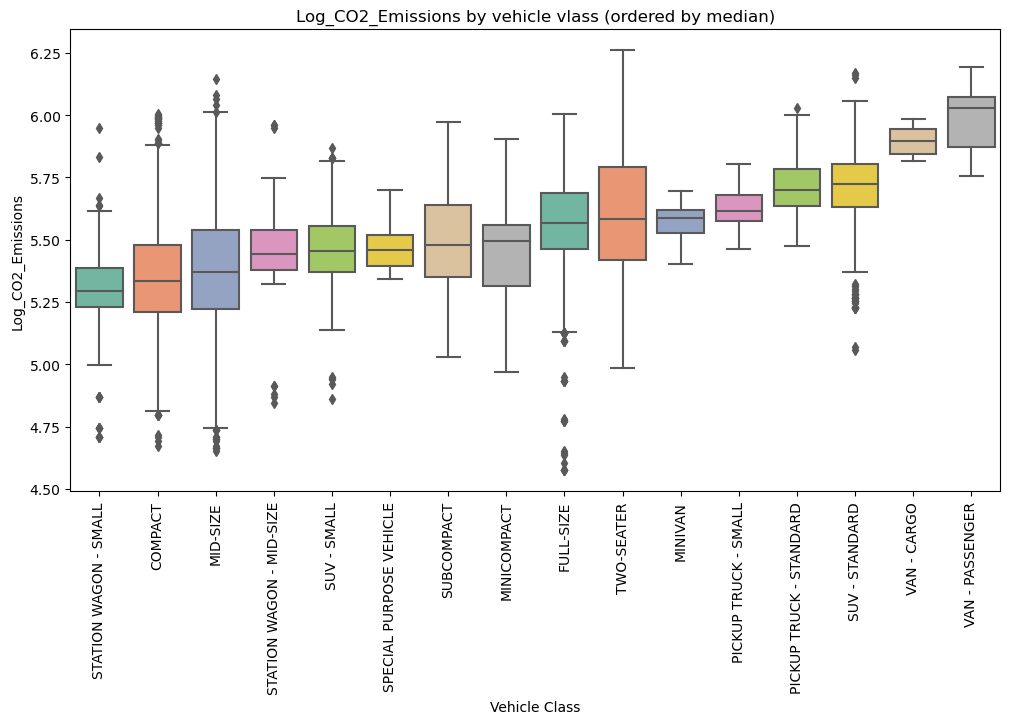

In [19]:
# Calculate the median CO2 emissions for each vehicle class
median_order = df.groupby('Vehicle Class')['Log_CO2_Emissions'].median().sort_values().index

# Plot the box plot ordered by median
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Vehicle Class', y='Log_CO2_Emissions', palette='Set2', order=median_order)
plt.title('Log_CO2_Emissions by vehicle vlass (ordered by median)')
plt.xticks(rotation=90)
plt.ylabel('Log_CO2_Emissions')
plt.show()

In [ ]:
Smaller vehicle classes, such as "Station Wagon - Small," "Compact," and "Mid-Size," generally exhibit lower median CO2 emissions, as shown by
their placement on the left side of the boxplot. In contrast, larger vehicle classes, including "SUV - Standard," "Van - Cargo," and "Van - Passenger,"
demonstrate higher median CO2 emissions, which can be attributed to their greater fuel consumption and heavier weight.

Outliers are evident across most vehicle classes. For example, the "Station Wagon - Small" and "Compact" classes include a few vehicles with 
significantly higher emissions compared to the majority. On the other hand, "Van - Cargo" and "Van - Passenger" have the highest median CO2 emissions,
likely due to their larger engine sizes and greater payload capacities.

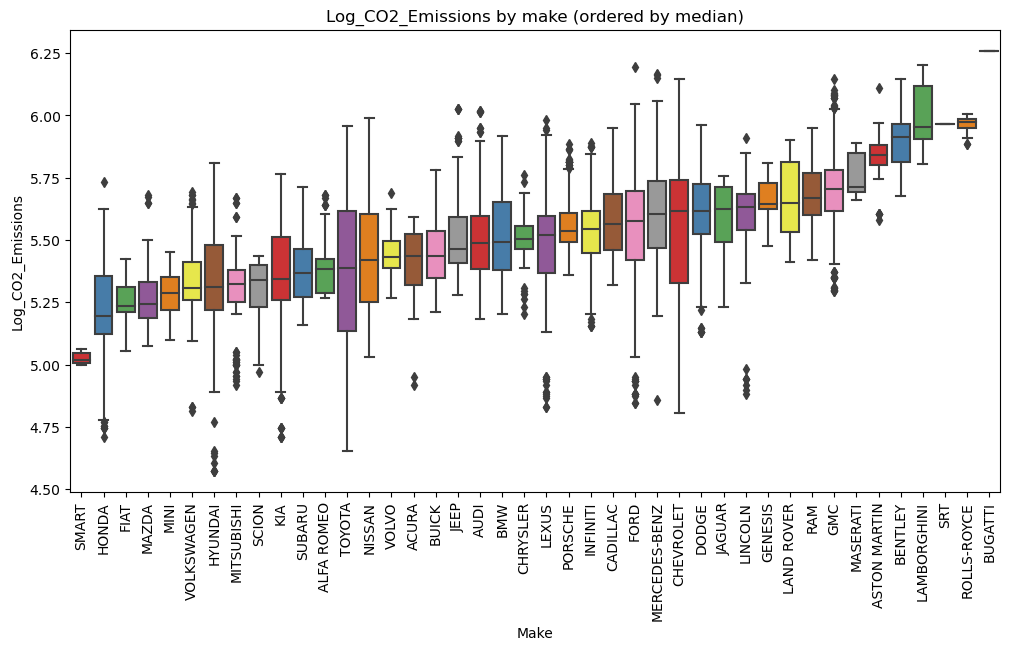

In [21]:
# Calculate the median CO2 emissions for each make
median_order = df.groupby('Make')['Log_CO2_Emissions'].median().sort_values().index

# Plot the box plot ordered by median
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Log_CO2_Emissions', palette='Set1', order=median_order)
plt.title('Log_CO2_Emissions by make (ordered by median)')
plt.xticks(rotation=90)
plt.ylabel('Log_CO2_Emissions')
plt.show()

In [ ]:
SMART, HONDA, and FIAT are positioned on the left with the lowest median log CO2 emissions, reflecting their focus on producing smaller, fuel-efficient
vehicles with reduced environmental impact. The broader range of emissions among other manufacturers indicates variability in performance across 
different product lines.

Luxury and performance brands such as LAMBORGHINI, ROLLS-ROYCE, and BUGATTI exhibit significantly higher median log CO2 emissions, emphasizing their
focus on high-performance vehicles equipped with larger, more powerful engines. Additionally, many manufacturers, including TOYOTA and CHEVROLET,
show notable outliers, likely representing high-performance or specialized models with emissions far exceeding their typical ranges.

Brands prioritizing fuel efficiency, such as SMART and HONDA, demonstrate lower emissions, whereas luxury and high-performance brands like
LAMBORGHINI and BUGATTI contribute substantially more. These findings highlight how vehicle design and market positioning significantly influence
emissions.

C:\Users\Grini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


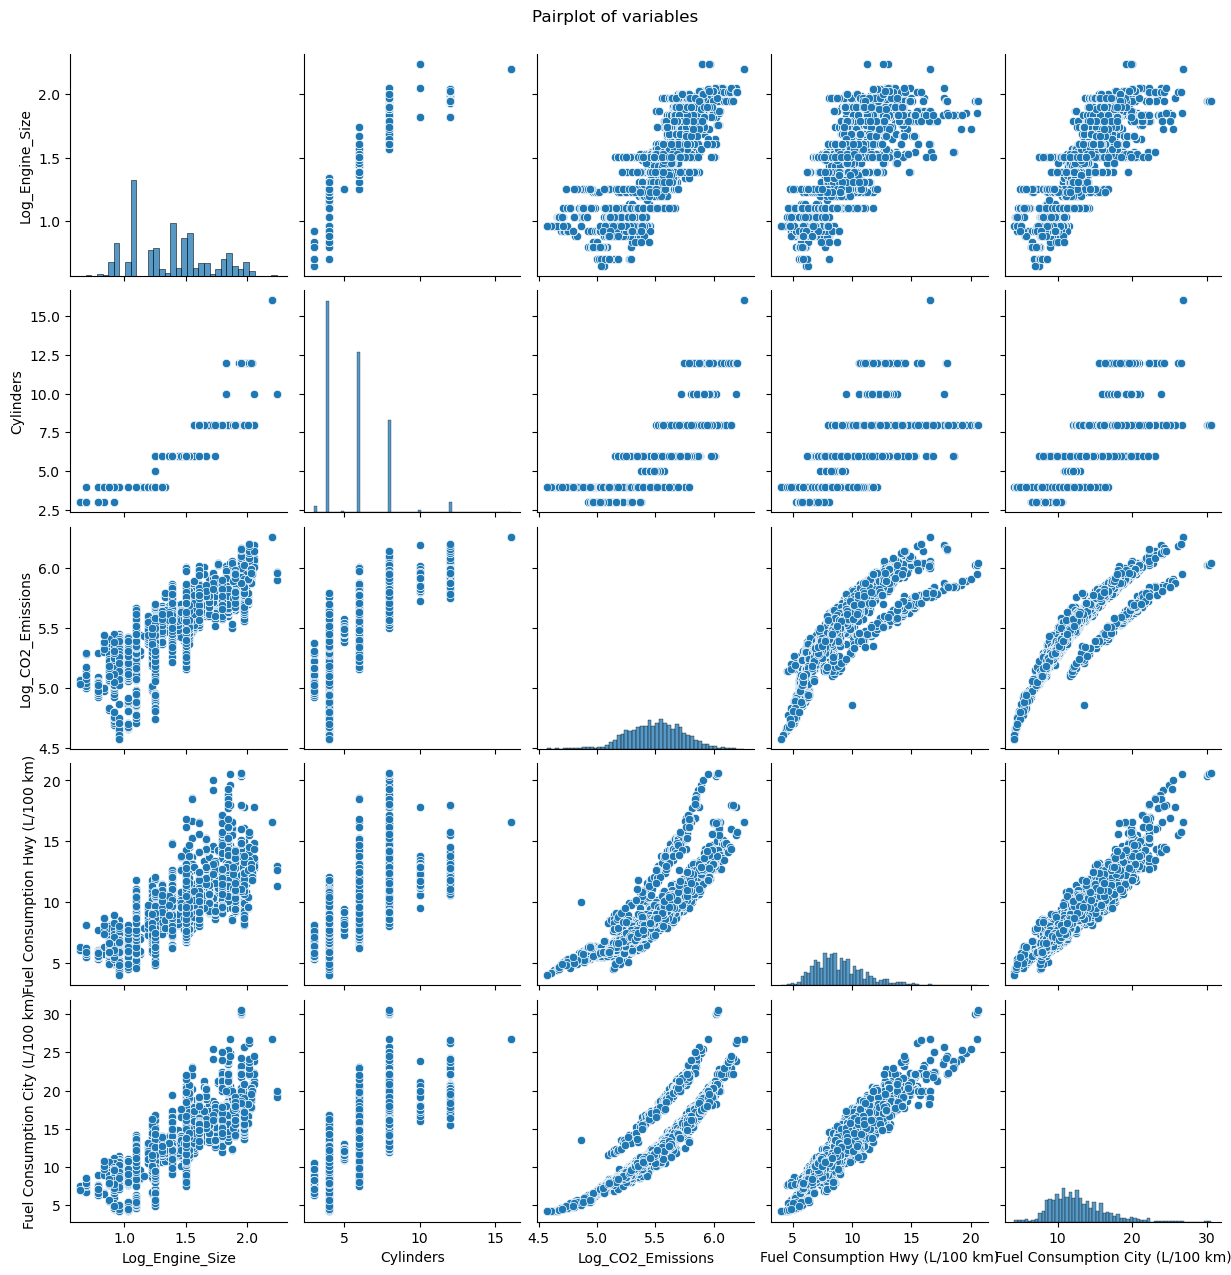

In [23]:
sns.pairplot(df[['Log_Engine_Size', 'Cylinders', 'Log_CO2_Emissions', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']])
plt.suptitle('Pairplot of variables', y=1.02)
plt.show()

In [ ]:
Strong correlations between engine size, cylinder count, fuel consumption, and CO2 emissions emphasize the significance of these variables in modeling
emissions. Logarithmic transformation enhances both normality and linearity, improving their suitability for regression and other analytical approaches. 
The distinct clustering observed for standard cylinder configurations and common engine sizes indicates well-defined vehicle categories within
the dataset. These relationships provide a solid foundation for developing a robust regression model to predict CO2 emissions based on engine size,
cylinder count, and fuel consumption metrics.

In [ ]:
Let's use facet plots to explore more complex relationships of interactions between multiple variables

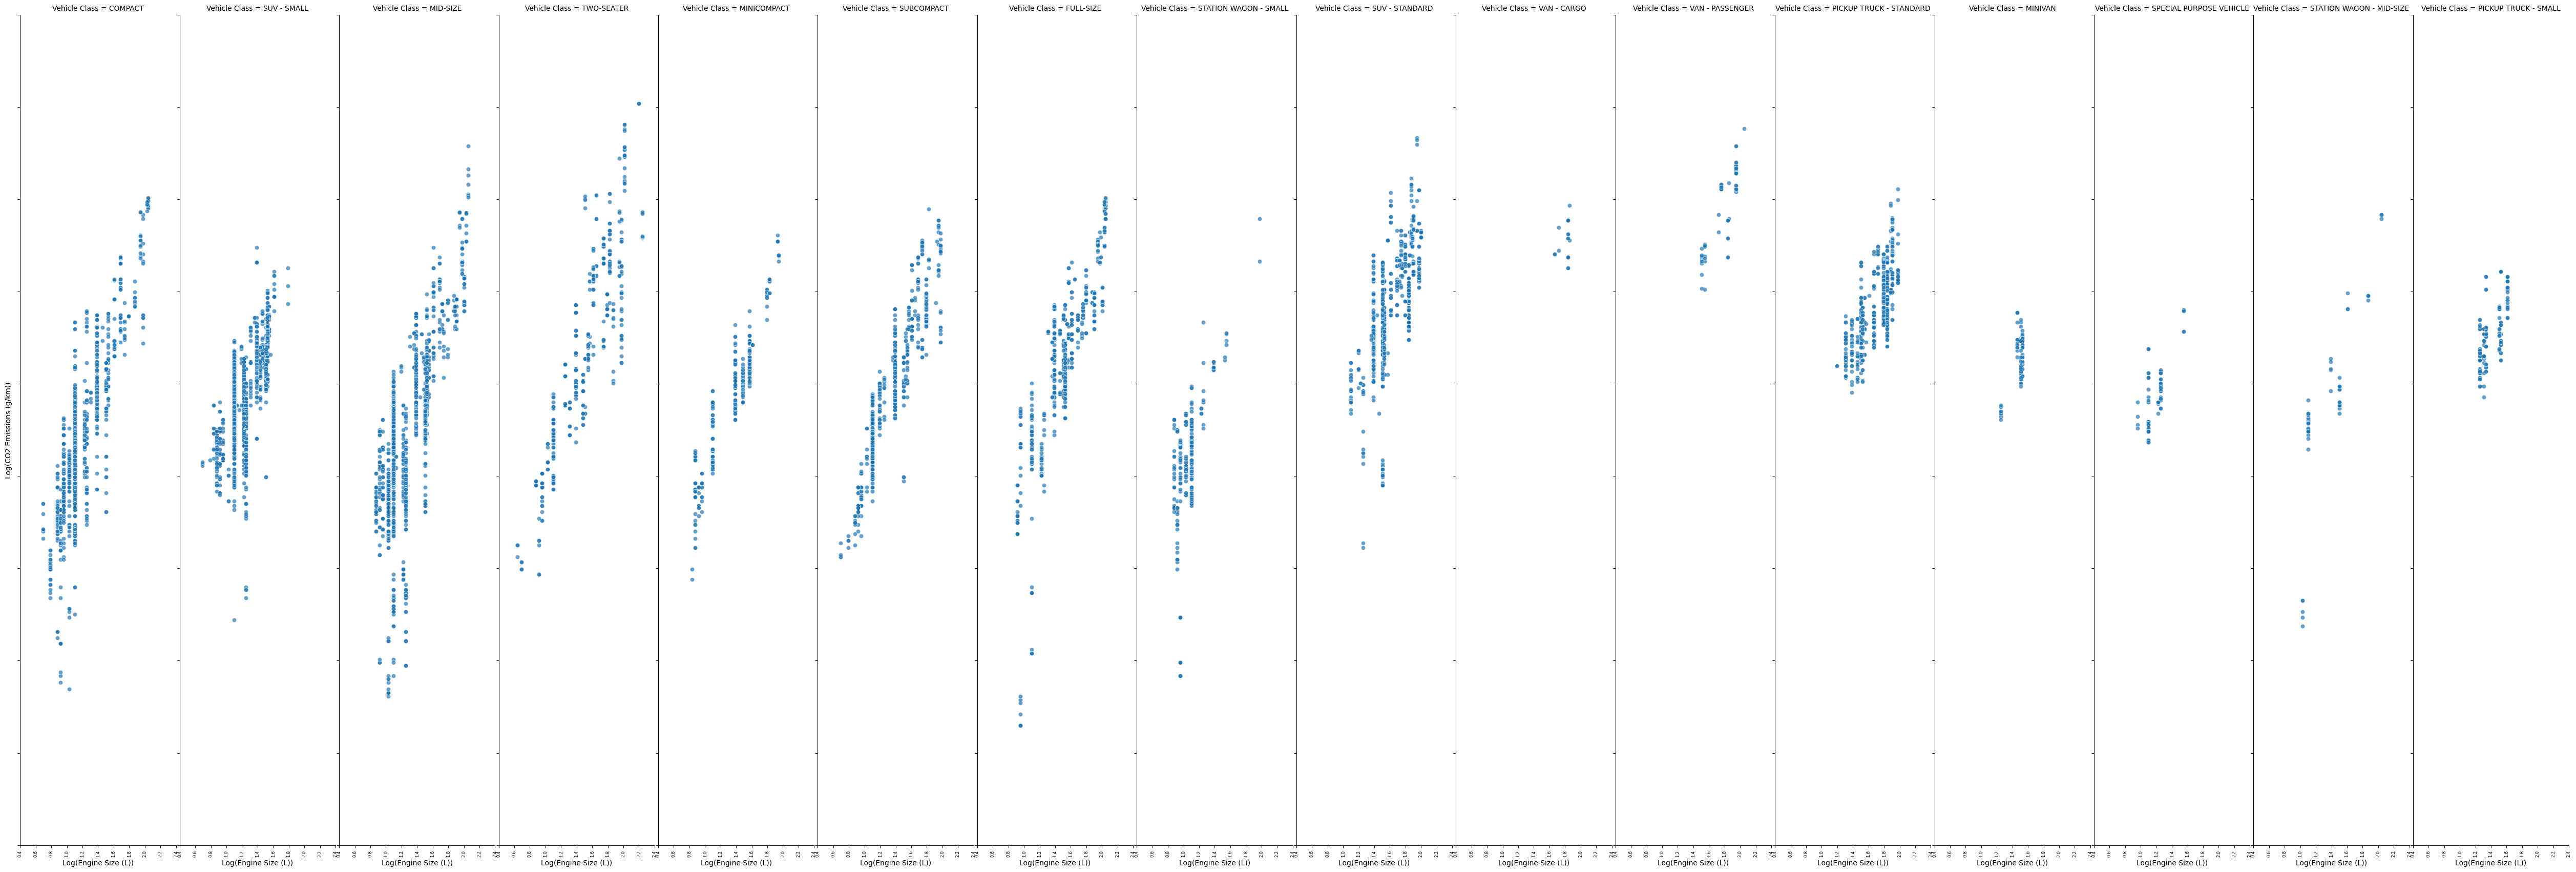

In [85]:
df_filtered = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Fuel Type', 
                  'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].copy()
df_filtered['Log Engine Size(L)'] = np.log1p(df_filtered['Engine Size(L)'])
df_filtered['Log CO2 Emissions(g/km)'] = np.log1p(df_filtered['CO2 Emissions(g/km)'])
facet = sns.FacetGrid(df_filtered, col='Vehicle Class', height=7, aspect=1.8, 
                      margin_titles=True)
facet.map(sns.scatterplot, 'Log Engine Size(L)', 'Log CO2 Emissions(g/km)', alpha=0.7)
facet.set_axis_labels('Log(Engine Size (L))', 'Log(CO2 Emissions (g/km))')
facet.set_titles(col_template='{col_name}', row_template='{row_name}')
facet.set_xticklabels(rotation=90)
plt.tight_layout()
plt.subplots_adjust(top=0.5)  
facet.fig.set_size_inches(50, 40) 

facet.set_titles(fontsize=6)
facet.set_axis_labels(fontsize=6)
facet.set_xticklabels(fontsize=6)
facet.set_yticklabels(fontsize=6)
for ax in facet.axes.flat:
    for label in ax.get_xticklabels():
        label.set_fontsize(6)
    for label in ax.get_yticklabels():
        label.set_fontsize(6)
plt.show()

In [ ]:
The plot underscores the strong relationship between CO2 emissions and engine size across different vehicle classes. Smaller vehicle classes
demonstrate more consistent emission patterns, while larger and specialty vehicles exhibit greater variability, likely driven by diverse design
features, fuel types, and intended uses. These insights are crucial for developing accurate models to predict emissions based on specific vehicle
characteristics.

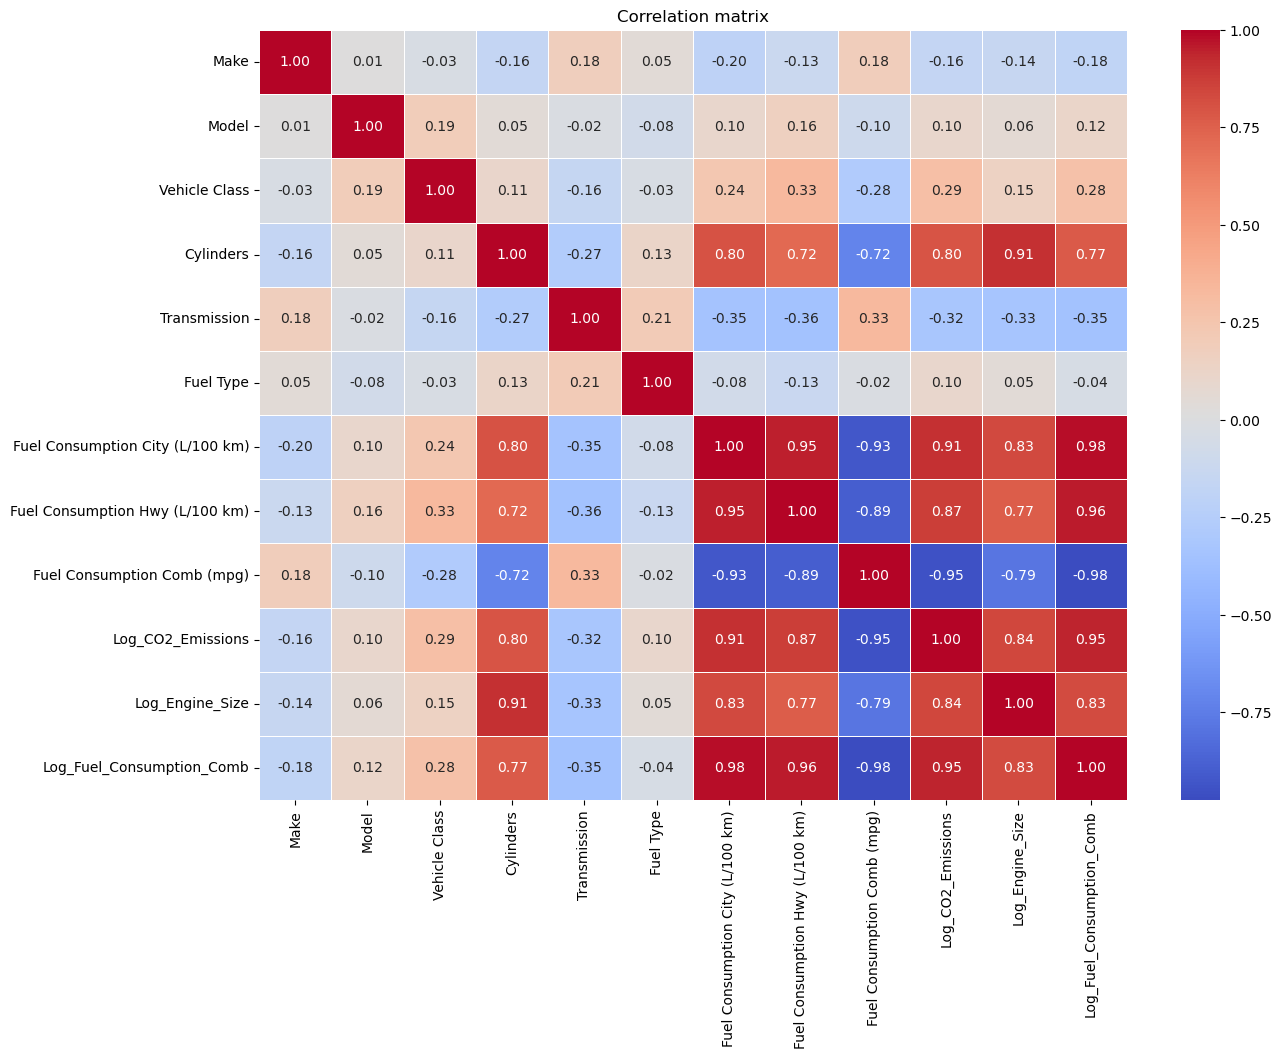

In [25]:
df_encoded = df.copy()

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode only categorical variables
for column in df_encoded.select_dtypes(include=[object]):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Apply log transformations to key numeric variables
df_encoded['Log_Engine_Size'] = np.log1p(df_encoded['Engine Size(L)'])
df_encoded['Log_CO2_Emissions'] = np.log1p(df_encoded['CO2 Emissions(g/km)'])
df_encoded['Log_Fuel_Consumption_Comb'] = np.log1p(df_encoded['Fuel Consumption Comb (L/100 km)'])

# Drop the original variables that were log-transformed
df_encoded.drop(['Engine Size(L)', 'CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)'], axis=1, inplace=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [ ]:
Key predictors for CO2 emissions include variables such as Log_Engine_Size, Fuel Consumption City (L/100 km), and Fuel Consumption Hwy (L/100 km),
given their strong correlations with emissions. Additionally, Cylinders is an important variable due to its significant relationship with engine size
and emissions. This correlation matrix underscores the critical variables for modeling CO2 emissions, suggesting that focusing on highly correlated
predictors, like Log_Engine_Size and fuel consumption metrics, will likely result in robust and reliable models. Conversely, weakly correlated
variables (e.g., Make) may be deprioritized. Leveraging log-transformed variables enhances modeling performance by improving both normality and
linearity, making them more suitable for regression and other predictive techniques.

In [ ]:
Boxplot for visualizing the relationship between Fuel Type and CO2 Emissions

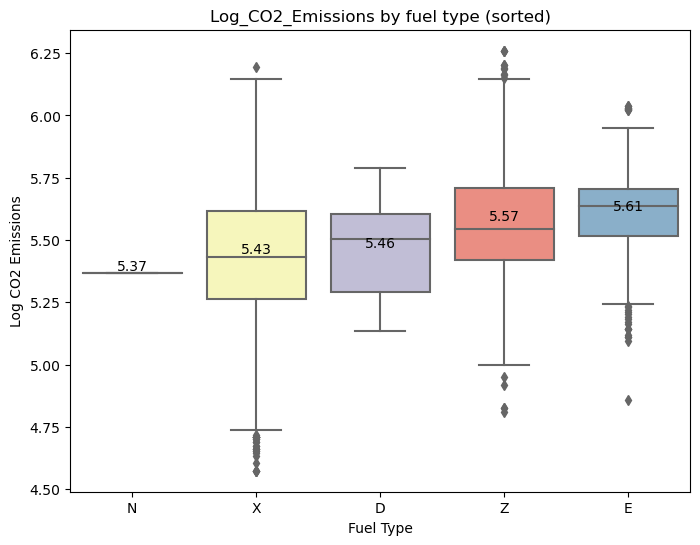

In [27]:
# Calculate mean Log_CO2_Emissions for each fuel type and sort by mean
mean_order = df.groupby('Fuel Type')['Log_CO2_Emissions'].mean().sort_values().index

# Create a boxplot sorted by the mean
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='Log_CO2_Emissions', data=df, order=mean_order, palette="Set3")

# Annotate mean values on the plot
mean_values = df.groupby('Fuel Type')['Log_CO2_Emissions'].mean()
for i, fuel_type in enumerate(mean_order):
    plt.text(i, mean_values[fuel_type], f'{mean_values[fuel_type]:.2f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

plt.title('Log_CO2_Emissions by fuel type (sorted)')
plt.xlabel('Fuel Type')
plt.ylabel('Log CO2 Emissions')
plt.show()

In [ ]:
The analysis suggests that fuel types Natural Gas (N), Regular Gasoline (X), and Diesel (D) are associated with lower mean log CO2 emissions, 
indicating they may be more sustainable options in terms of emissions, with consistent performance.

In contrast, Premium Gasoline (Z) and Ethanol (E85) (E) exhibit higher emissions and greater variability.

Further investigation is needed to understand the factors contributing to these trends, which may include vehicle design, engine size, or intended
usage patterns.

This visualization highlights the role that fuel type plays in influencing CO2 emissions, underscoring the importance of selecting more
efficient and eco-friendly fuel types to reduce environmental impact. I am going to further test this hypotheses. To test this, 
I will perform a statistical analysis using ANOVA (Analysis of Variance), which is suitable for comparing the means of CO2 emissions across
different groups (in this case, the fuel types).

Null Hypothesis (H₀): Fuel Type does not influence CO2 Emissions (i.e., the mean CO2 emissions are the same across all fuel types).
Alternative Hypothesis (H₁): Fuel Type influences CO2 Emissions (i.e., at least one fuel type has a different mean CO2 emission).

In order to proceed with ANOVA text, I need to ensure that the Log CO2 emissions for each fuel type follow a normal distribution.

In [ ]:
Normality test: Shapiro-Wilk test for each fuel type group

In [107]:
# Apply log transformation
df['Log_CO2_Emission'] = np.log1p(df['CO2 Emissions(g/km)'])  

# Get the unique fuel types
fuel_types = df['Fuel Type'].unique()

# Perform Shapiro-Wilk test for each fuel type
for fuel in fuel_types:
    group = df[df['Fuel Type'] == fuel]['Log_CO2_Emission']
    
    # Skip if there are fewer than 3 data points
    if len(group) < 3:
        print(f"Skipping Shapiro-Wilk test for {fuel} because there are fewer than 3 data points.")
        continue
    
    # Perform Shapiro-Wilk test
    stat, p = stats.shapiro(group)
    print(f"Shapiro-Wilk test for {fuel}: p-value = {p}")
    
    # Determine if the distribution is normal
    if p < 0.05:
        print(f"  => The data for {fuel} does not follow a normal distribution.")
    else:
        print(f"  => The data for {fuel} follows a normal distribution.")

Shapiro-Wilk test for Z: p-value = 9.129951298019606e-15
  => The data for Z does not follow a normal distribution.
Shapiro-Wilk test for D: p-value = 1.7116029482622253e-07
  => The data for D does not follow a normal distribution.
Shapiro-Wilk test for X: p-value = 8.336213663806546e-15
  => The data for X does not follow a normal distribution.
Shapiro-Wilk test for E: p-value = 3.094766611866362e-07
  => The data for E does not follow a normal distribution.
Skipping Shapiro-Wilk test for N because there are fewer than 3 data points.


In [ ]:
The results from the Shapiro-Wilk test indicate that the Log CO2 emissions for each fuel type (Z, D, X, E) do not follow a normal distribution, 
as the p-values are all much smaller than 0.05. This violates the assumption of normality required for performing an ANOVA.
As a next step I am going to generate Q-Q plots for each fuel type to visually assess the deviations from normality.                                                                                                                                              

Skipping Q-Q plot for N because there are fewer than 3 data points.


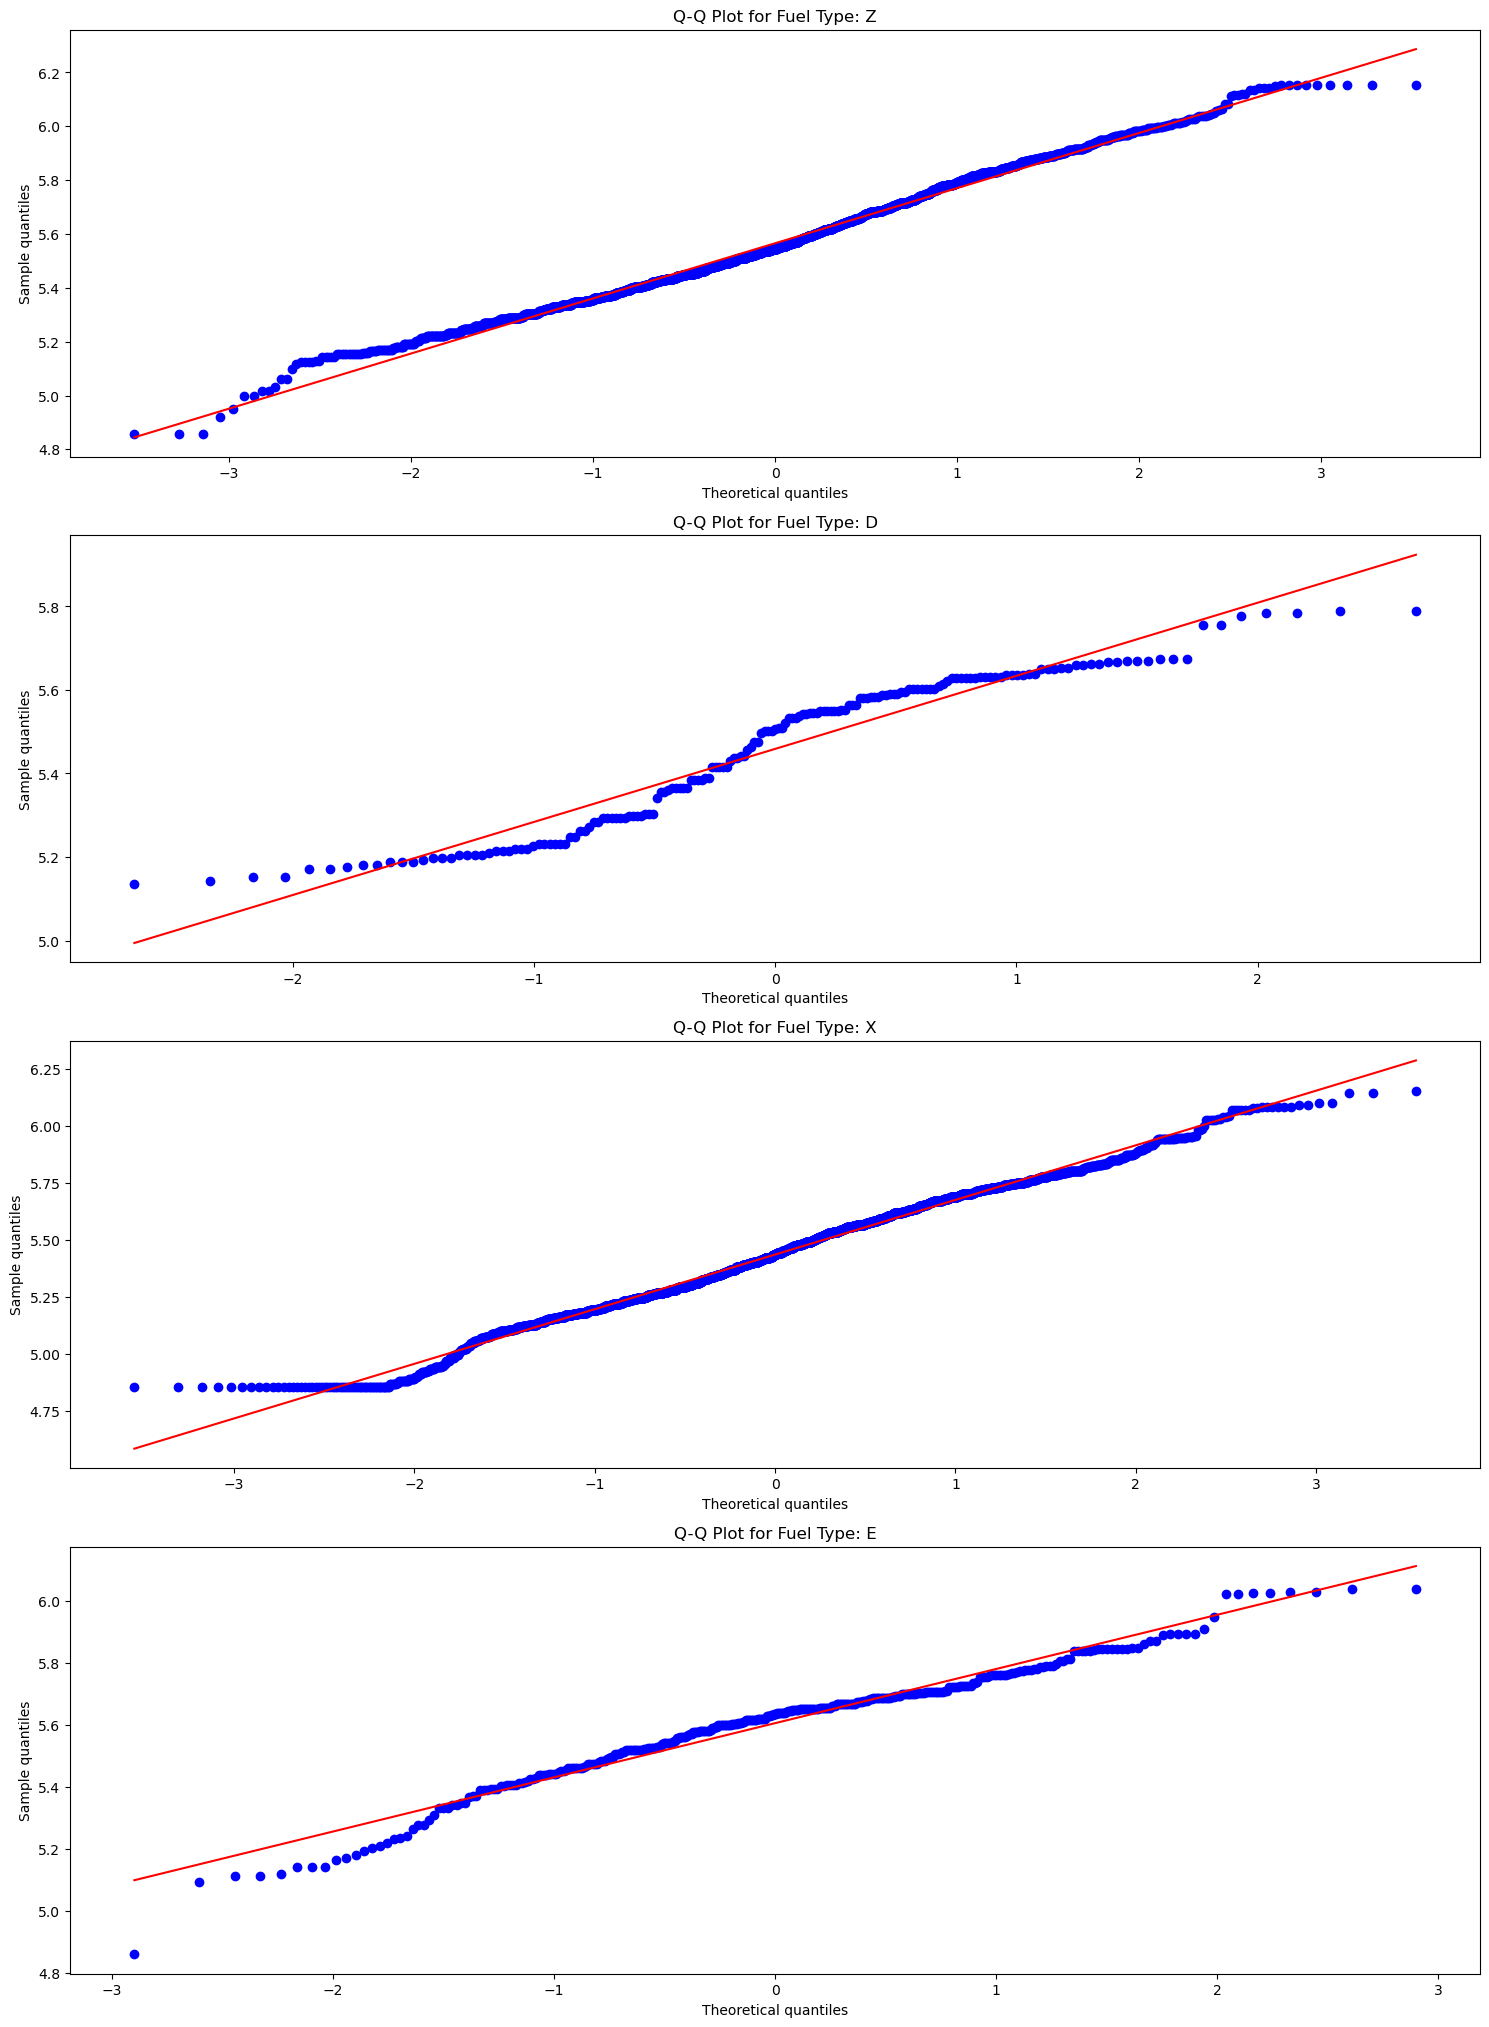

In [113]:
# Create Q-Q plots for each fuel type
plt.figure(figsize=(15, len(fuel_types) * 5))  

for i, fuel in enumerate(fuel_types, start=1):
    group = df[df['Fuel Type'] == fuel]['Log_CO2_Emissions']
    if len(group) < 3:
        print(f"Skipping Q-Q plot for {fuel} because there are fewer than 3 data points.")
        continue
    plt.subplot(len(fuel_types), 1, i)
    stats.probplot(group, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for Fuel Type: {fuel}")
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')

plt.tight_layout()
plt.show()

In [ ]:
All fuel types (Z, D, X, and E) show deviations at the tails, suggesting non-normality in the distribution of log-transformed CO2 emissions. 

In [ ]:
##IV. Modeling

In [ ]:
####Random Sampling Approach
Traditional parametric tests assume normality, and deviations from this assumption can compromise their validity. By randomly sampling and performing
multiple hypothesis tests, this method avoids reliance on normality assumptions and provides a robust way to detect differences between groups.

Repeating the process multiple times further ensures that the results are consistent and not overly influenced by outliers or anomalies within
specific subsets of the data. This approach validates the stability and reliability of the findings and allows us to make stronger conclusions about
whether fuel type significantly influences emissions.

In [29]:
# Define parameters
sample_size = 100  # Fixed sample size for each fuel type
tests_to_repeat = 100  # Number of repetitions for sampling and testing

# Placeholder for storing p-values from multiple tests
p_values = []

# Perform random sampling and hypothesis testing
for i in range(tests_to_repeat):
    sampled_data = []
    
    # Randomly sample data points from each fuel type group (Log CO2 Emissions)
    for fuel in df['Fuel Type'].unique():
        group = df[df['Fuel Type'] == fuel]['Log_CO2_Emissions']
        if len(group) >= sample_size:
            sampled_data.append(np.random.choice(group, size=sample_size, replace=False))
        else:
            sampled_data.append(group)  # Include smaller groups as is

    # Perform Kruskal-Wallis test on the sampled data
    stat, p = kruskal(*sampled_data)
    p_values.append(p)

# Summarize results
p_values = np.array(p_values)
print(f"Proportion of tests with p-value < 0.05: {np.mean(p_values < 0.05):.2f}")

# Interpretation
if np.mean(p_values < 0.05) > 0.5:
    print("=> Majority of the tests indicate a significant difference among fuel types (Log CO2 Emissions).")
else:
    print("=> Majority of the tests fail to indicate a significant difference among fuel types (Log CO2 Emissions).")

Proportion of tests with p-value < 0.05: 1.00
=> Majority of the tests indicate a significant difference among fuel types (Log CO2 Emissions).


In [ ]:
The results demonstrate that all tests consistently reject the null hypothesis at a significance level of 0.05, indicating a statistically significant
difference in Log CO2 Emissions across fuel types. A proportion of 1.00 confirms that 100% of the repeated random sampling tests resulted in p-values
less than 0.05, consistently rejecting the Null Hypothesis (H₀) that fuel type does not influence CO2 emissions. This strongly supports the
Alternative Hypothesis (H₁): Fuel Type influences CO2 emissions, with at least one fuel type showing significantly different emissions compared to
others.

As the next step, I will estimate confidence intervals for the hypothesis test by applying bootstrapping. This approach will help calculate the
confidence intervals for the differences in means among the fuel types, further refining the understanding of these differences.

In [ ]:
###Bootstrapping
As the next step, I will perform bootstrapping to estimate confidence intervals for the differences in means among fuel types. These intervals will
quantify the uncertainty of the findings, offering a more comprehensive understanding of the relationship between fuel type and emissions.
Additionally, bootstrapping naturally incorporates outliers in the resampling process, making it a robust and reliable method for handling datasets
with extreme values.

In [130]:
# Function to compute bootstrap confidence intervals for Log CO2 Emissions
def bootstrap_confidence_intervals_log(data, fuel_type1, fuel_type2, num_iterations=10000, confidence_level=0.95):
    # Extract log-transformed data for the two fuel types
    group1 = data[data['Fuel Type'] == fuel_type1]['Log_CO2_Emissions']
    group2 = data[data['Fuel Type'] == fuel_type2]['Log_CO2_Emissions']
    
    # Store bootstrapped differences
    bootstrapped_differences = []
    
    for _ in range(num_iterations):
        # Resample with replacement
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        
        # Calculate the difference in means
        bootstrapped_differences.append(np.mean(sample1) - np.mean(sample2))
    
    # Compute confidence intervals
    lower_bound = np.percentile(bootstrapped_differences, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_differences, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound, np.mean(bootstrapped_differences)

fuel_types = df['Fuel Type'].unique()
for i, fuel_type1 in enumerate(fuel_types):
    for fuel_type2 in fuel_types[i + 1:]:
        ci_lower, ci_upper, mean_diff = bootstrap_confidence_intervals_log(df, fuel_type1, fuel_type2)
        print(f"Bootstrap Confidence Interval for Log CO2 Emissions ({fuel_type1} vs {fuel_type2}):")
        print(f"  Mean Difference: {mean_diff:.3f}")
        print(f"  95% CI: ({ci_lower:.3f}, {ci_upper:.3f})\n")

Bootstrap Confidence Interval for Log CO2 Emissions (Z vs D):
  Mean Difference: 0.107
  95% CI: (0.079, 0.135)

Bootstrap Confidence Interval for Log CO2 Emissions (Z vs X):
  Mean Difference: 0.131
  95% CI: (0.121, 0.142)

Bootstrap Confidence Interval for Log CO2 Emissions (Z vs E):
  Mean Difference: -0.040
  95% CI: (-0.059, -0.020)

Bootstrap Confidence Interval for Log CO2 Emissions (Z vs N):
  Mean Difference: 0.200
  95% CI: (0.193, 0.207)

Bootstrap Confidence Interval for Log CO2 Emissions (D vs X):
  Mean Difference: 0.024
  95% CI: (-0.003, 0.052)

Bootstrap Confidence Interval for Log CO2 Emissions (D vs E):
  Mean Difference: -0.147
  95% CI: (-0.178, -0.115)

Bootstrap Confidence Interval for Log CO2 Emissions (D vs N):
  Mean Difference: 0.093
  95% CI: (0.066, 0.119)

Bootstrap Confidence Interval for Log CO2 Emissions (X vs E):
  Mean Difference: -0.171
  95% CI: (-0.191, -0.151)

Bootstrap Confidence Interval for Log CO2 Emissions (X vs N):
  Mean Difference: 0.069

In [ ]:
####Results interpretation
For most fuel type pairs, the confidence interval does not include 0, indicating a statistically significant difference in CO2 emissions between these
fuel types. However, for the pair D and X, the confidence interval includes 0, suggesting that the differences in CO2 emissions between these two fuel
types are not statistically significant.

In [ ]:
####Further Modeling 
I plan to analyze the variables that influence emissions using two modeling approaches: Elastic Net and OLS.

Elastic Net is well-suited for predictive modeling because it handles multicollinearity effectively and performs feature selection. It identifies the
most important predictors by reducing the impact of less relevant variables, making the model more interpretable and robust.

OLS Regression will complement Elastic Net by providing clear coefficients, enabling hypothesis testing, and serving as a baseline for comparison. 
While OLS may not handle multicollinearity well, it reveals the direct relationships between variables and emissions, offering valuable insights into
the data.

I will start the analysis with variables that were identified as significant in the correlation matrix: 'Log_Engine_Size,'
'Fuel Consumption City (L/100 km),' 'Fuel Consumption Hwy (L/100 km),' and 'Cylinders.' Additionally, I will include 'Fuel Type' in the model to
compare its influence on emissions.

In [31]:
# Encode the Fuel Type variable into numeric values
label_encoder = LabelEncoder()
df['Fuel Type Numeric'] = label_encoder.fit_transform(df['Fuel Type'])

# Define predictors and target variable
predictors_no_fuel = ['Log_Engine_Size', 'Fuel Consumption City (L/100 km)', 
                      'Fuel Consumption Hwy (L/100 km)', 'Cylinders']
predictors_with_fuel = predictors_no_fuel + ['Fuel Type Numeric']
target = 'Log_CO2_Emissions'

# Function to evaluate Elastic Net and OLS
def evaluate_models(predictors, label):
    print(f"\n=== Evaluating Models ({label}) ===\n")
    
    # Split the data into train and test sets
    X = df[predictors]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Elastic Net with Cross-Validation
    elastic_net_cv = ElasticNetCV(cv=5, random_state=42, alphas=np.logspace(-4, 0, 50), l1_ratio=np.linspace(0.1, 1.0, 10))
    elastic_net_cv.fit(X_train, y_train)
    
    # Best parameters
    best_alpha = elastic_net_cv.alpha_
    best_l1_ratio = elastic_net_cv.l1_ratio_
    
    # Fit Elastic Net with optimal parameters
    elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
    elastic_net.fit(X_train, y_train)
    
    # Evaluate Elastic Net
    y_pred_en = elastic_net.predict(X_test)
    rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
    r2_en = r2_score(y_test, y_pred_en)
    
    # Feature coefficients
    elastic_net_coefficients = pd.DataFrame({
        'Feature': predictors,
        'Coefficient': elastic_net.coef_
    }).query("Coefficient != 0").sort_values(by='Coefficient', ascending=False)
    
    print(f"Best Alpha: {best_alpha}")
    print(f"Best L1 Ratio: {best_l1_ratio}")
    print(f"Elastic Net R2 Score: {r2_en:.3f}")
    print(f"Elastic Net RMSE: {rmse_en:.3f}")
    print("Elastic Net Selected Features:")
    print(elastic_net_coefficients)
    
    # OLS Regression
    selected_features = elastic_net_coefficients['Feature'].tolist()
    X_ols = sm.add_constant(X[selected_features])  # Add constant for intercept
    ols_model = sm.OLS(y, X_ols).fit()
    
    # Print OLS summary
    print("\nOLS Regression Results:")
    print(ols_model.summary())
    return r2_en, rmse_en, ols_model.rsquared

# Evaluate models without fuel type
r2_no_fuel, rmse_no_fuel, ols_r2_no_fuel = evaluate_models(predictors_no_fuel, "Without Fuel Type")

# Evaluate models with fuel type
r2_with_fuel, rmse_with_fuel, ols_r2_with_fuel = evaluate_models(predictors_with_fuel, "With Fuel Type")

# Compare Results
print("\n=== Model Comparison ===\n")
print(f"Elastic Net (Without Fuel Type): R2 = {r2_no_fuel:.3f}, RMSE = {rmse_no_fuel:.3f}")
print(f"Elastic Net (With Fuel Type):    R2 = {r2_with_fuel:.3f}, RMSE = {rmse_with_fuel:.3f}")
print(f"OLS (Without Fuel Type):         R2 = {ols_r2_no_fuel:.3f}")
print(f"OLS (With Fuel Type):            R2 = {ols_r2_with_fuel:.3f}")



=== Evaluating Models (Without Fuel Type) ===

Best Alpha: 0.0001
Best L1 Ratio: 0.1
Elastic Net R2 Score: 0.847
Elastic Net RMSE: 0.093
Elastic Net Selected Features:
                            Feature  Coefficient
0                   Log_Engine_Size     0.179863
1  Fuel Consumption City (L/100 km)     0.035397
2   Fuel Consumption Hwy (L/100 km)     0.015715
3                         Cylinders     0.006122

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:      Log_CO2_Emissions   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.051e+04
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:28:08   Log-Likelihood:                 7247.6
No. Observations:                7385   AIC:                        -1.449e+04
Df Resid

In [ ]:
Fuel type plays an important role in enhancing model performance, highlighting its significant impact on CO₂ emissions. This emphasizes the necessity
of incorporating fuel type as a key variable in emissions modeling.

Elastic Net is well-suited for predictive tasks, as it effectively addresses multicollinearity while performing feature selection to identify the most
relevant predictors.

OLS serves as a complementary approach, offering interpretable coefficients and confirming the statistical significance of variables, making it valuable
for understanding the relationships between predictors and emissions.

The models identify Log_Engine_Size, Fuel Consumption City, and Fuel Consumption Hwy as the most influential predictors of CO₂ emissions.

In [ ]:
###Analysis of Residuals

In [245]:
# Function to compute residuals and predictions
def compute_residuals(df, model, predictors, target, add_const=False):
    if add_const:
        df['const'] = 1  # Add constant for OLS
        predictors = ['const'] + predictors
    df['predicted'] = model.predict(df[predictors])
    df['residuals'] = df[target] - df['predicted']
    return df

# Function to plot residual distribution and Q-Q plot
def plot_resid_dist(df):
    resids = df['residuals']
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    # Histogram of residuals
    sns.histplot(resids, bins=20, kde=True, ax=ax[0])
    ax[0].set_title('Histogram of Residuals')
    ax[0].set_xlabel('Residual Values')
    # Q-Q plot
    stats.probplot(resids, plot=ax[1])
    ax[1].set_title('Q-Q Normal Plot of Residuals')
    plt.tight_layout()
    plt.show()

# Function to plot residuals vs predicted values
def residual_plot(df):
    fig, ax = plt.subplots(figsize=(8, 5))
    rmse = np.std(df['residuals'])
    sns.scatterplot(x='predicted', y='residuals', data=df, ax=ax)
    ax.axhline(0.0, color='red', linewidth=1.0)
    ax.axhline(2.0 * rmse, color='red', linestyle='dashed', linewidth=1.0)
    ax.axhline(-2.0 * rmse, color='red', linestyle='dashed', linewidth=1.0)
    ax.set_title('Residuals vs. Predicted')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    plt.tight_layout()
    plt.show()

# Function to evaluate and analyze residuals for Elastic Net and OLS
def analyze_models(df, predictors, target, label):
    print(f"\n=== {label} ===\n")
    
    # Split data into train and test sets
    X = df[predictors]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Elastic Net Model
    en_cv = ElasticNetCV(cv=5, random_state=42, alphas=np.logspace(-4, 0, 50), l1_ratio=np.linspace(0.1, 1.0, 10))
    en_cv.fit(X_train, y_train)
    
    best_alpha = en_cv.alpha_
    best_l1_ratio = en_cv.l1_ratio_
    elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
    elastic_net.fit(X_train, y_train)
    
    # Predictions for Elastic Net
    y_pred_en = elastic_net.predict(X_test)
    rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
    r2_en = r2_score(y_test, y_pred_en)
    
    # OLS Regression
    X_ols = sm.add_constant(X)  # Add constant for OLS
    ols_model = sm.OLS(y, X_ols).fit()
    
    # Analyze residuals for Elastic Net
    df_test_en = compute_residuals(df.copy(), elastic_net, predictors, target)
    print("\nElastic Net Residuals Analysis:")
    plot_resid_dist(df_test_en)
    residual_plot(df_test_en)
    
    # Analyze residuals for OLS
    df_test_ols = compute_residuals(df.copy(), ols_model, predictors, target, add_const=True)
    print("\nOLS Residuals Analysis:")
    plot_resid_dist(df_test_ols)
    residual_plot(df_test_ols)


=== Models Without Fuel Type ===


Elastic Net Residuals Analysis:


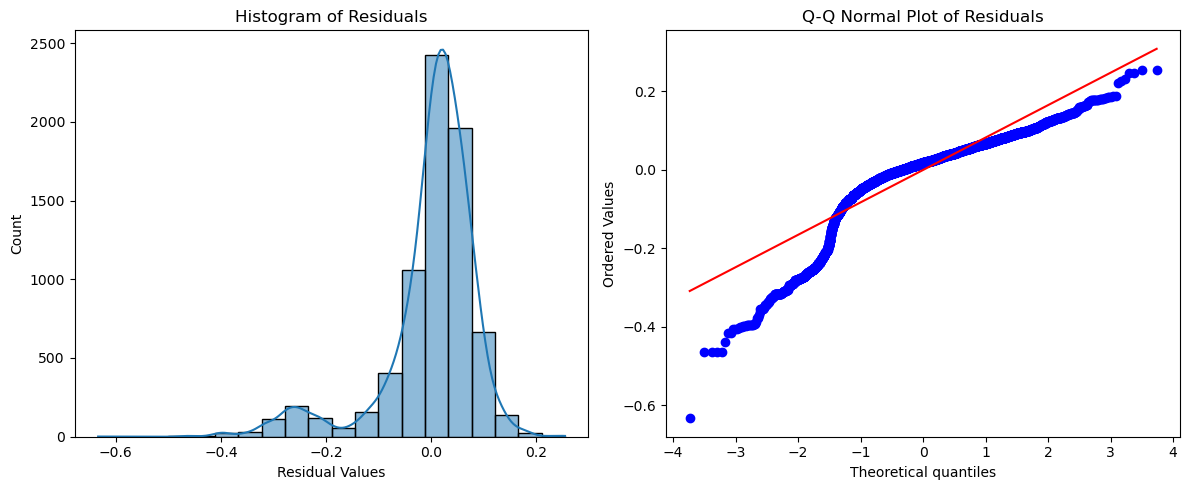

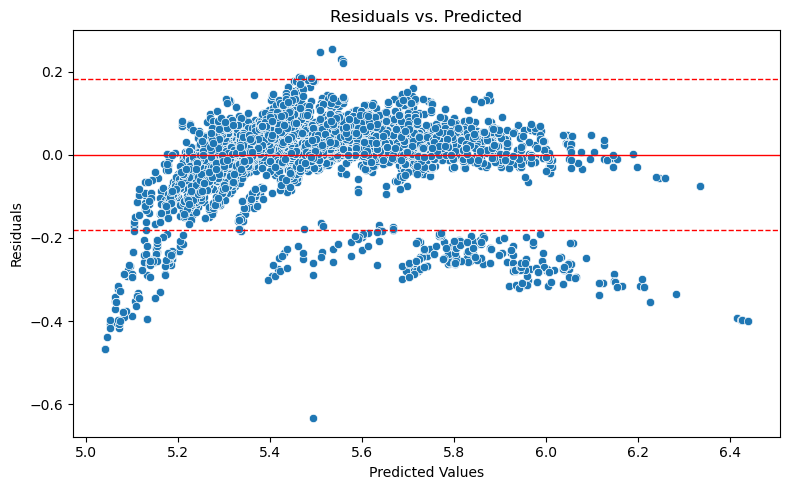


OLS Residuals Analysis:


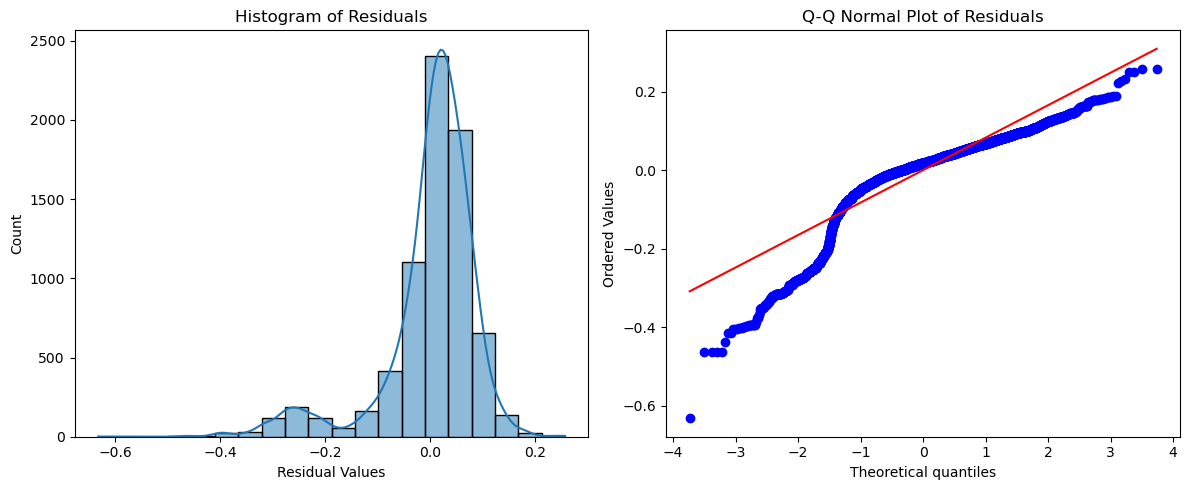

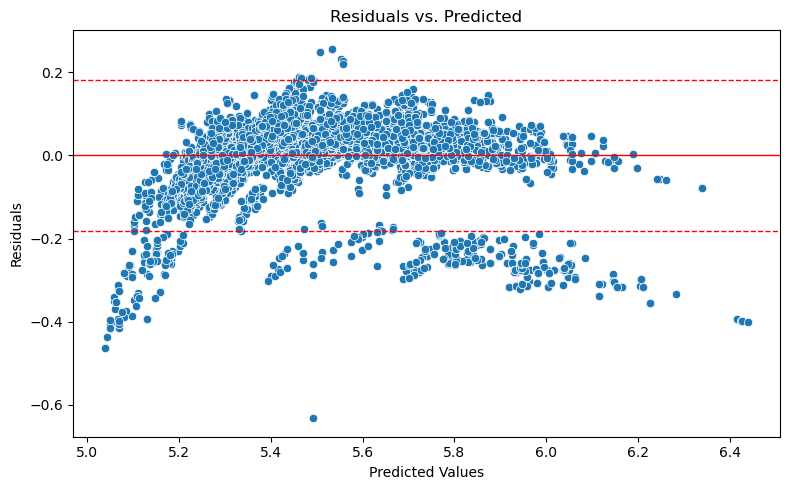

In [247]:
# Analyze models without fuel type
analyze_models(df, predictors_no_fuel, target, "Models Without Fuel Type")


=== Models With Fuel Type ===


Elastic Net Residuals Analysis:


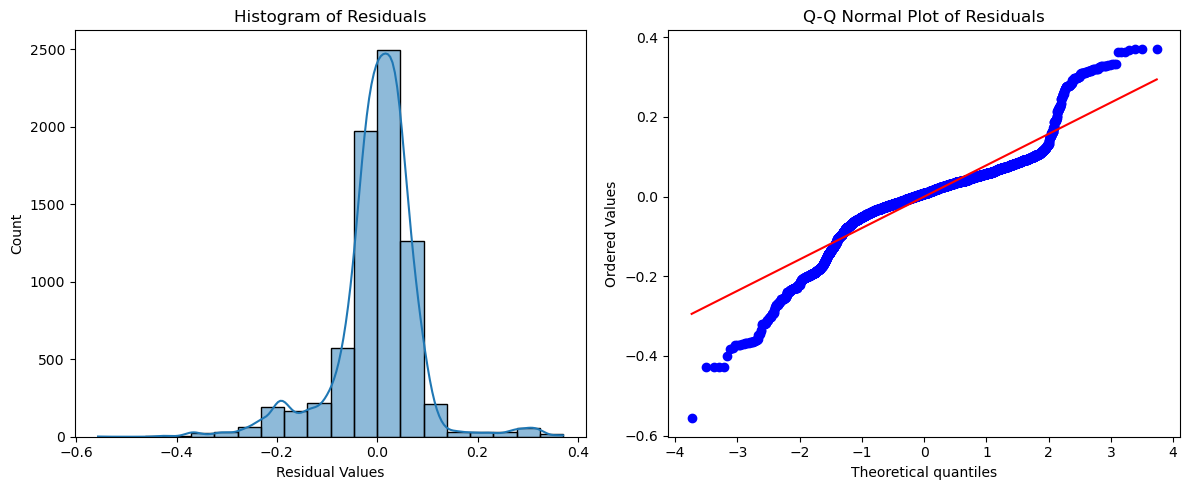

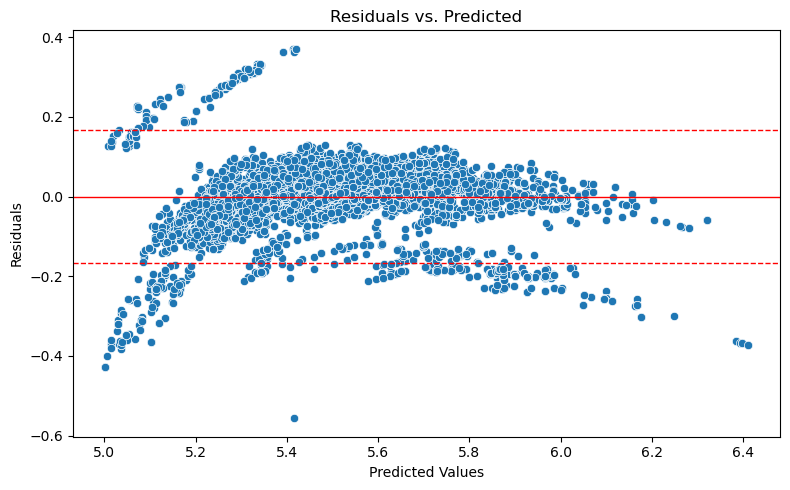


OLS Residuals Analysis:


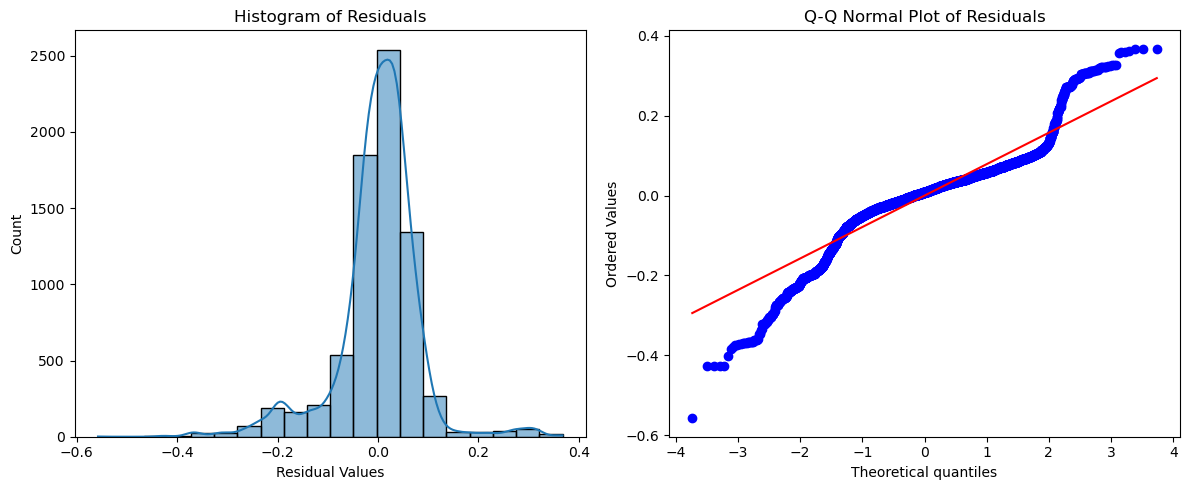

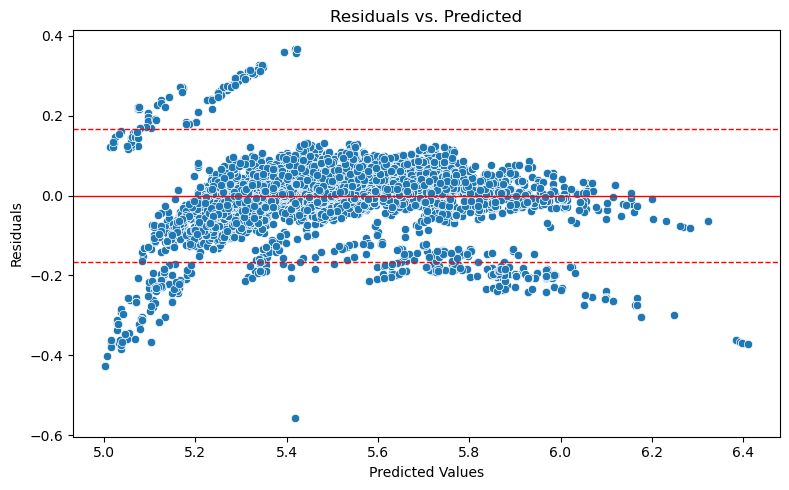

In [249]:
# Analyze models with fuel type
analyze_models(df, predictors_with_fuel, target, "Models With Fuel Type")

In [ ]:
####Summary of observations
Histogram of Residuals: Residuals are roughly symmetric but deviate slightly from normality, especially in the tails
Q-Q Plot: Deviations from the theoretical normal line, particularly in the tails, indicate residual non-normality
Residuals vs Predicted: Clear signs of heteroscedasticity, where the spread of residuals increases with predicted values.
This suggests that the models are less effective in capturing variability in CO₂ emissions for different ranges.

In [ ]:
###V. Conclusion
I applied square root and inverse transformations, as well as interaction terms between Fuel Type and Log_Engine_Size, but these adjustments did not
significantly improve the results. In some cases, they even worsened the outcomes. Among these, the square root transformation yielded slightly better
results concerning normality, but heteroscedasticity persisted.

Based on these observations, I assume that hierarchical models could provide a better approach by conducting prediction and residual analysis for each
segment (fuel type) separately. However, due to time and resource constraints, I was unable to explore this option further.

In [ ]:
##References:

1. Vehicle CO2 Emissions Dataset: https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data
2. Stephen Elston's GitHub Repository: CSCI-E-83 Notebooks